In [12]:
import pandas as pd

df_copy = pd.read_csv("df_copy.csv")

In [13]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

df_copy.set_index('Date', inplace=True)
df_copy

,Open,High,Low,Close,Adj Close,Volume,Open_brent,High_brent,Low_brent,Close_brent,...,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,465.86,468.17,452.42,457.33,457.33,2.105680e+07,57.299999,57.770000,55.820000,57.330002,...,457.33,457.33,457.33,457.33,457.33,2.105680e+07,2.105680e+07,2.105680e+07,2.105680e+07,2.105680e+07
2014-09-18,456.86,456.86,413.10,424.44,424.44,3.448320e+07,57.299999,57.770000,55.820000,57.330002,...,457.33,457.33,457.33,457.33,457.33,2.105680e+07,2.105680e+07,2.105680e+07,2.105680e+07,2.105680e+07
2014-09-19,424.10,427.83,384.53,394.80,394.80,3.791970e+07,57.299999,57.770000,55.820000,57.330002,...,424.44,457.33,457.33,457.33,457.33,3.448320e+07,2.105680e+07,2.105680e+07,2.105680e+07,2.105680e+07
2014-09-20,394.67,423.30,389.88,408.90,408.90,3.686360e+07,57.299999,57.770000,55.820000,57.330002,...,394.80,424.44,457.33,457.33,457.33,3.791970e+07,3.448320e+07,2.105680e+07,2.105680e+07,2.105680e+07
2014-09-21,408.08,412.43,393.18,398.82,398.82,2.658010e+07,57.299999,57.770000,55.820000,57.330002,...,408.90,394.80,424.44,457.33,457.33,3.686360e+07,3.791970e+07,3.448320e+07,2.105680e+07,2.105680e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-16,97580.49,97725.59,96060.98,96175.03,96175.03,1.653676e+10,75.239998,75.830002,74.489998,74.739998,...,97580.35,97508.97,96623.87,97885.86,95747.43,1.704727e+10,3.269799e+10,3.714728e+10,4.934045e+10,3.748878e+10
2025-02-17,96179.01,97032.23,95243.55,95773.38,95773.38,2.733655e+10,75.239998,75.830002,74.489998,74.739998,...,96175.03,97580.35,97508.97,96623.87,97885.86,1.653676e+10,1.704727e+10,3.269799e+10,3.714728e+10,4.934045e+10
2025-02-18,95773.81,96695.38,93388.84,95539.55,95539.55,3.732572e+10,74.639999,76.050003,74.190002,75.839996,...,95773.38,96175.03,97580.35,97508.97,96623.87,2.733655e+10,1.653676e+10,1.704727e+10,3.269799e+10,3.714728e+10


c:\Users\ASUS\Desktop\470_project\env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Test MSE: 147430329.79
Test MAE: 5246.36
Test R² : 0.7497
Test R²%: 74.97%


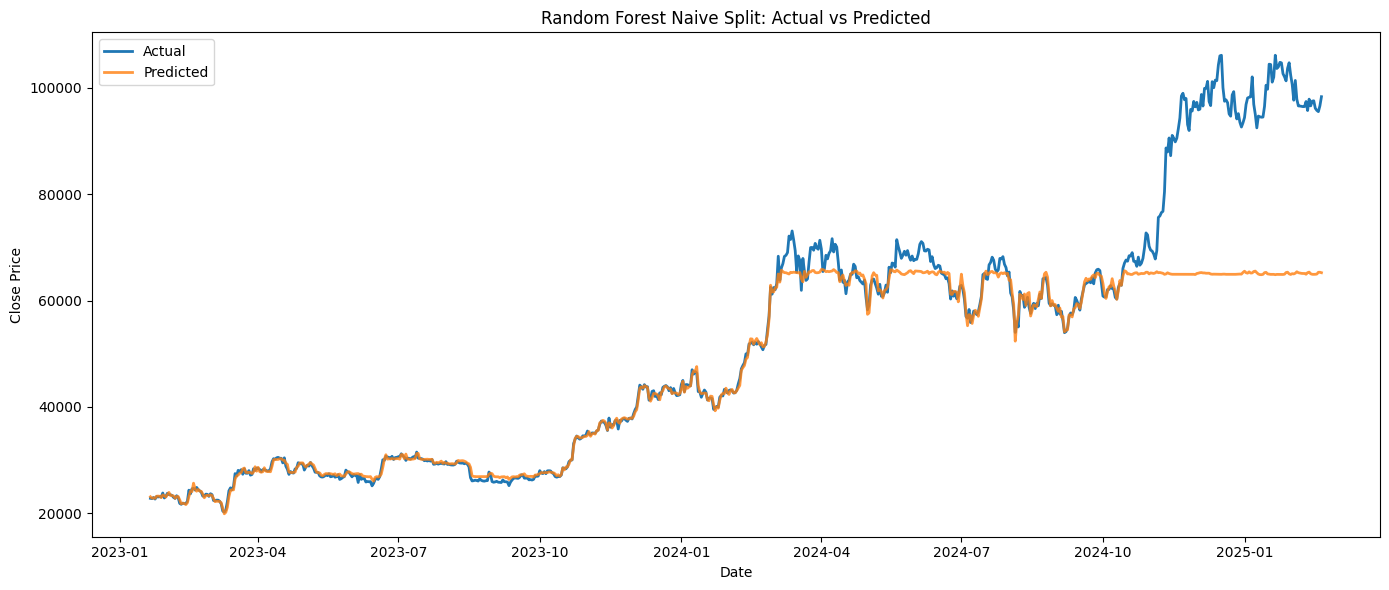

In [15]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = df_copy.copy()
df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']        = df.index.day
df['DayOfWeek'] = df.index.dayofweek

X = df.drop(columns={'Close', 'Adj Close'})

n_test = int(len(X) * 0.2)
X_test = X.iloc[-n_test:]
y = df['Close']
y_test = y.iloc[-n_test:]


with open('rf_naive_features.pkl','rb') as f:
    feature_names = pickle.load(f)
with open('rf_naive_scaler.pkl','rb') as f:
    scaler = pickle.load(f)
with open('rf_naive_model.pkl','rb') as f:
    model = pickle.load(f)


X_test_s = scaler.transform(X_test)
X_test_s_df = pd.DataFrame(X_test_s, columns=X_test.columns, index=X_test.index)
X_sub = X_test_s_df[feature_names]

y_pred = model.predict(X_sub)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R² : {r2:.4f}")
print(f"Test R²%: {r2*100:.2f}%")


plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test,    label='Actual',   linewidth=2)
plt.plot(y_test.index, y_pred,    label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Random Forest Naive Split: Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()


Burada naive split yapan random forest test edildi

Loaded model config: {'window_size': 762, 'threshold': 0.2, 'n_estimators': 100}
Test MSE : 5273401.69
Test MAE : 833.09
Test R²  : 0.9910
Test MAPE: 1.02%


c:\Users\ASUS\Desktop\470_project\env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


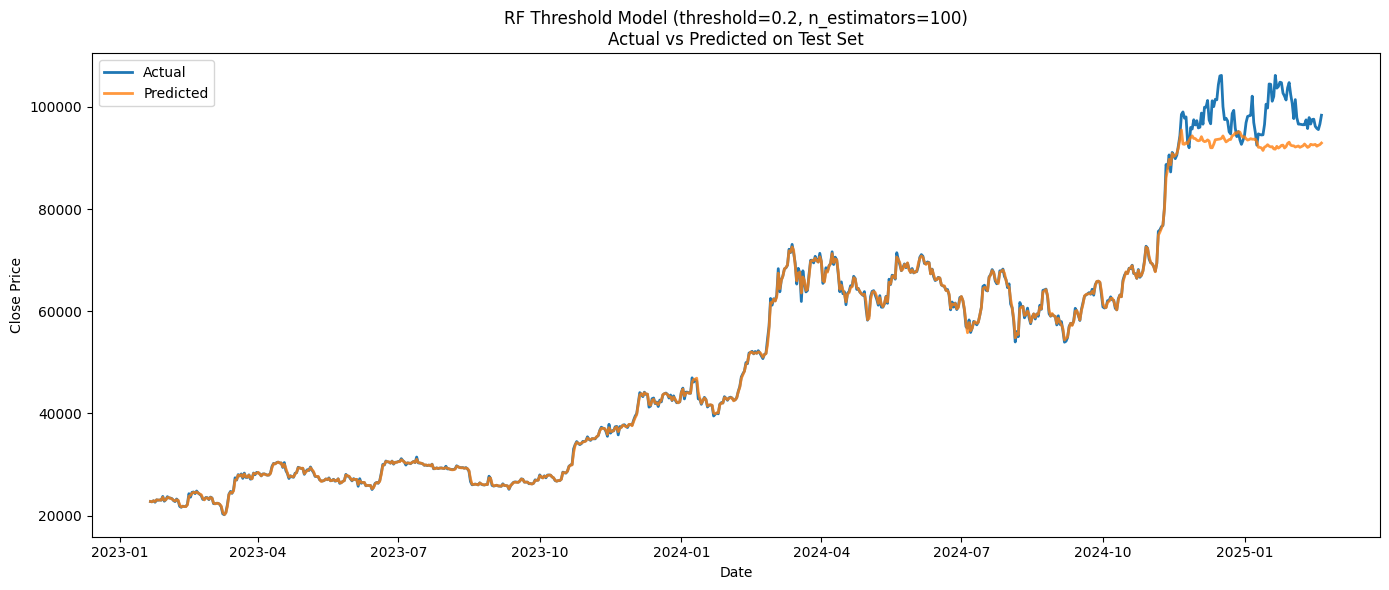

In [16]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = df_copy.copy()
df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']        = df.index.day
df['DayOfWeek'] = df.index.dayofweek

X = df.drop(columns=['Close','Adj Close'])
y = df['Close']

n_test = int(len(X) * 0.2)
X_test = X.iloc[-n_test:]
y_test = y.iloc[-n_test:]


with open('rf_threshold_features.pkl', 'rb') as f:
    feature_names = pickle.load(f)
with open('rf_threshold_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
with open('rf_threshold_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('rf_threshold_config.pkl', 'rb') as f:
    config = pickle.load(f)

print("Loaded model config:", config)


X_test_s = scaler.transform(X_test)

X_test_s_df = pd.DataFrame(X_test_s, columns=X_test.columns, index=X_test.index)
X_sub = X_test_s_df[feature_names]


y_pred = model.predict(X_sub)


mse  = mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100

print(f"Test MSE : {mse:.2f}")
print(f"Test MAE : {mae:.2f}")
print(f"Test R²  : {r2:.4f}")
print(f"Test MAPE: {mape:.2f}%")


plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test,    label='Actual',   linewidth=2)
plt.plot(y_test.index, y_pred,    label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f"RF Threshold Model (threshold={config['threshold']}, "
          f"n_estimators={config['n_estimators']})\n"
          "Actual vs Predicted on Test Set")
plt.legend()
plt.tight_layout()
plt.show()


Burada sliding window stratejisiyle çalışan RF test edildi.

In [25]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from joblib import load
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = df_copy.copy()


df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']       = df.index.day
df['DayOfWeek'] = df.index.dayofweek

for lag in (1,2,3):
    df[f'Close_lag{lag}'] = df['Close'].shift(lag)
df.dropna(inplace=True)


X = df.drop(columns=['Close','Adj Close'])
y = df['Close']
n_test = int(len(X) * 0.2)
X_test = X.iloc[-n_test:]
y_test = y.iloc[-n_test:]


with open('mlp_features.pkl','rb') as f:
    feature_names = pickle.load(f)
scaler    = load('scaler.joblib')
mlp_model = load('best_mlp_model.joblib')
with open('mlp_config.pkl','rb') as f:
    config = pickle.load(f)

print("Loaded MLP config:", config)



X_test_s = scaler.transform(X_test)
X_test_s_df = pd.DataFrame(X_test_s, columns=X_test.columns, index=X_test.index)
X_sub = X_test_s_df[feature_names]


y_pred = mlp_model.predict(X_sub)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MSE : {mse:.2f}")
print(f"Test MAE : {mae:.2f}")
print(f"Test R²  : {r2:.4f}")
print(f"Test R²% : {r2*100:.2f}%")


plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test,    label='Actual',   linewidth=2)
plt.plot(y_test.index, y_pred,    label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("MLPRegressor: Actual vs Predicted on Test Set")
plt.legend()
plt.tight_layout()
plt.show()


Loaded MLP config: {'hidden_layer_sizes': (100, 50), 'alpha': np.float64(0.0001), 'max_iter': 500, 'activation': 'relu', 'solver': 'adam', 'random_state': 42}


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Day
- DayOfWeek
- Month
- Year


Test MSE: 353818.53
Test MAE: 378.16
Test R² : 0.9994
Test R²%: 99.94%


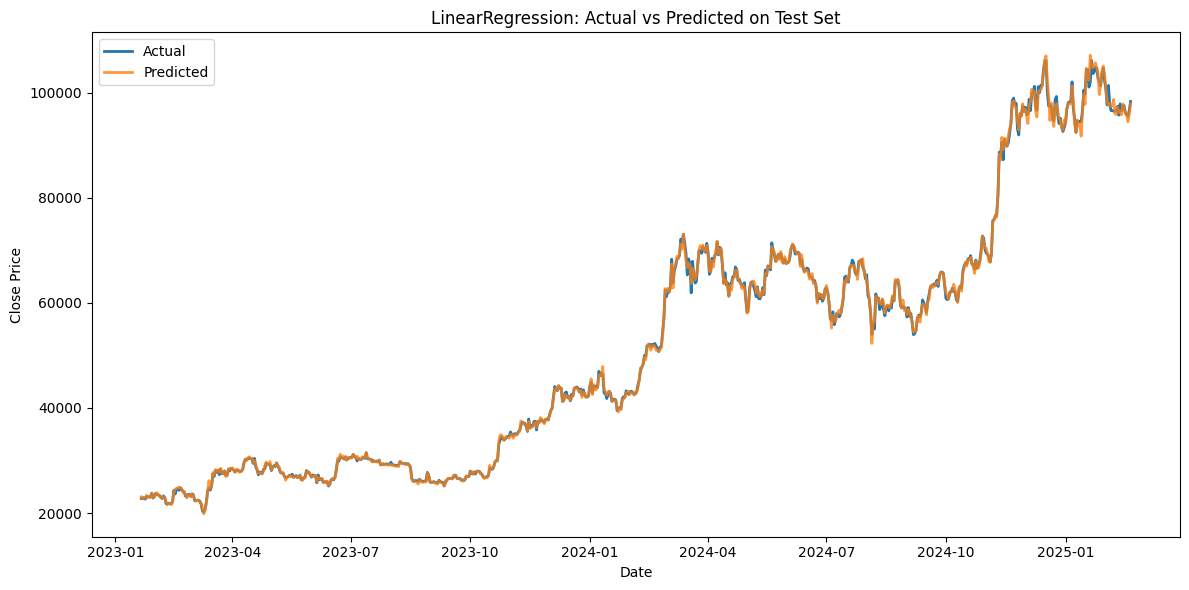

In [24]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


df = df_copy.copy()
df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']       = df.index.day
df['DayOfWeek'] = df.index.dayofweek

X = df.drop(columns=['Close','Adj Close'])
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


with open('linear_regression_refit.pkl',       'rb') as f:
    lr_model       = pickle.load(f)
with open('linear_regression_features.pkl',    'rb') as f:
    feature_names  = pickle.load(f)


X_test_sub = X_test[feature_names]


y_pred = lr_model.predict(X_test_sub)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R² : {r2:.4f}")
print(f"Test R²%: {r2*100:.2f}%")


plt.figure(figsize=(12,6))
plt.plot(y_test.index,    y_test,    label='Actual',   linewidth=2)
plt.plot(y_test.index,    y_pred,    label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LinearRegression: Actual vs Predicted on Test Set')
plt.legend()
plt.tight_layout()
plt.show()


burada lineer regresyon test edildi.

Loaded XGB config: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'random_state': 42}
Test MSE:  154561957.63
Test MAE:  5562.42
Test R² :  0.7374
Test R²%: 73.74%


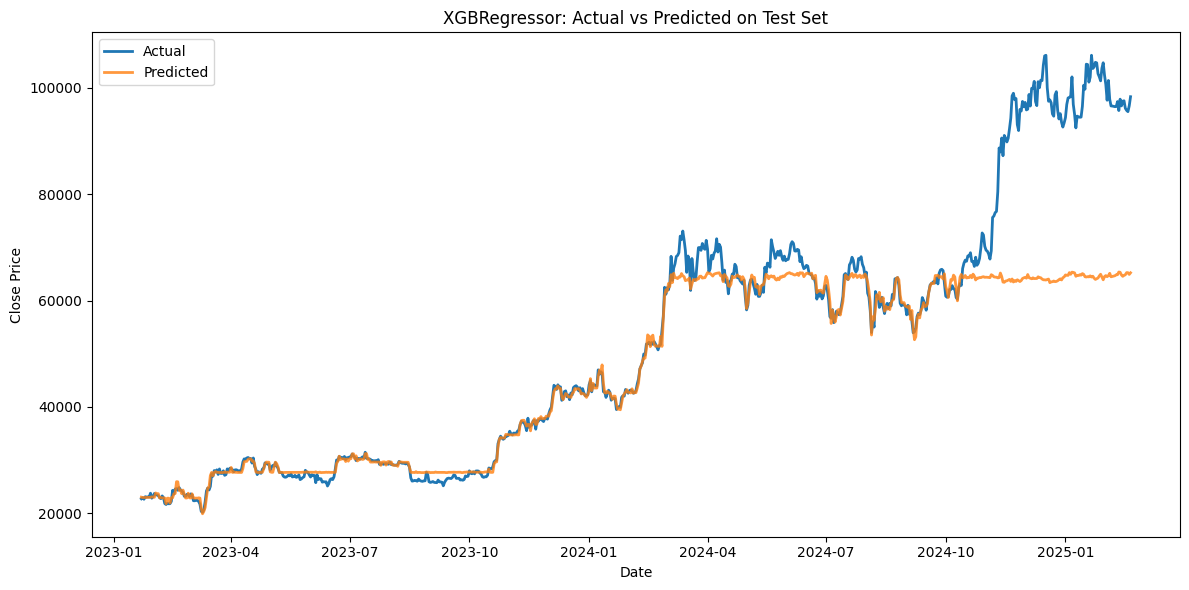

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = df_copy.copy()
df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']       = df.index.day
df['DayOfWeek'] = df.index.dayofweek
for lag in (1,2,3):
    df[f'Close_lag{lag}'] = df['Close'].shift(lag)
df.dropna(inplace=True)


X = df.drop(columns=['Close','Adj Close'])
y = df['Close']
n_test = int(len(X) * 0.2)
X_test = X.iloc[-n_test:]
y_test = y.iloc[-n_test:]


with open('xgb_features.pkl','rb') as f:
    feature_names = pickle.load(f)
with open('xgb_best_model.pkl','rb') as f:
    model = pickle.load(f)
with open('xgb_config.pkl','rb') as f:
    config = pickle.load(f)

print("Loaded XGB config:", config)


X_sub = X_test[feature_names]


y_pred = model.predict(X_sub)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Test MSE:  {mse:.2f}")
print(f"Test MAE:  {mae:.2f}")
print(f"Test R² :  {r2:.4f}")
print(f"Test R²%: {r2*100:.2f}%")


plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual',   linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("XGBRegressor: Actual vs Predicted on Test Set")
plt.legend()
plt.tight_layout()
plt.show()


Bu da XGBoost testi.